**Name: Trang Hoang**

# Topics: Predicting Reddits Upvote Ratio with TD-IDF and Machine Learning

## 1. Abstract: 

This research investigates the efficacy of regression models combined with term frequency-inverse document frequency (TF-IDF) text analysis in predicting Reddit post popularity, measured by upvote ratios across various subreddits. Employing TF-IDF to quantify the impact of linguistic patterns in post titles, the study examines the influence of specific words on popularity. The Random Forest Regression model showcased a moderate correlation with upvote ratios (Pearson coefficient of 0.379848) and was able to account for a small portion of variance in post popularity $R^2$ of 0.094325. In contrast, Linear Regression displayed a negative $R^2$ value, suggesting limited applicability in predicting upvote ratios. The findings highlight the nuanced role of language in content engagement, indicating that no single term overwhelmingly dictates popularity, and suggest that while the predictive power of the models is not robust, they offer valuable insights into understanding content popularity on Reddit.

## 2. Introduction

Reddit is a social news website and forum where users can submit content and vote on it. On Reddit, users create posts in communities called subreddits, which are organized around specific topics. The popularity of these posts is primarily determined by the community through upvotes and downvotes, with the upvote ratio serving as a key metric reflecting the percentage of users who liked the content. A post's title plays a vital role in drawing attention, acquiring votes, and acting as a decisive factor in the content's engagement and reach. 

In recent years, social media platforms like Reddit have not only fostered online communities but have also demonstrated substantial social and economic influence. The dramatic increase and holding of household investor ownership in GameStop shares, furthered through discourse on subreddit communities such as r/SuperStonk and r/WallStreetBets, is one event of many that exemplifies the real-world impact that community solidarity on such platforms can have. This event, which saw the stock rocket from $3 to highs nearing $483, inflicted significant losses on hedge funds engaged in illegal naked short-selling [1]. This dramatic market movement underscores the importance of understanding social media trends and their potential to empower communities of individuals to take action. This research aims to dissect the mechanism behind Reddit post popularity by analyzing post titles through TF-IDF and its correlation with the post's upvote ratio. The motivation behind this study is to study the importance of a word relative to the upvote ratio and to decode the digital pulses that drive user engagement on Reddit.

## 3. Research Question:

**Research Question:**

- How effectively can regression models, when integrated with TF-IDF text analysis of Reddit post titles, predict a post's popularity as reflected by its upvote ratio across different subreddits?
- Which specific words or features in Reddit post titles are most influential in determining a post's popularity, based on the upvote ratio?

**Hypothesis:**
The hypothesis of this study suggests that the transformation of Reddit post titles into a TF-IDF weighted feature space, coupled with the application of supervised learning models like Linear Regression and Random Forest Regression, enables the prediction of post popularity. It posits that the popularity, indicated by the upvote ratio, can be influenced and predicted through linguistic patterns. These patterns are quantified using TF-IDF values, highlighting the significance of specific words within the corpus of post titles.

## 4.Data/ Variable of Interest

This study utilizes a dataset acquired from Kaggle by Pratham Saraf [2] the Reddit API, featuring a compilation of the top 10 daily posts from ten specific subreddits: 'AskReddit', 'worldnews', 'science', 'technology', 'politics', 'explainlikeimfive', 'movies', 'sports', 'gaming', and 'books'. The dataset, updated 9 months ago, included the following variables: post titles, author, subreddit, score, permalink, creation time, number of comments, upvote ratio, URL, post ID, whether it is original content, flair, and a list of comments corresponding to a post. With around 4400 records, this dataset provides a basic foundation for analyzing words' importance and the popularity of a vote through the upvote ratio. 

In this research, our variable of interest is the correlation between the importance of words in Reddit post titles and the upvote ratio. The upvote ratio of Reddit posts, defined as the proportion of upvotes to the total of votes a post receives, serves as a quantifiable measure of popularity. This measurement of popularity is an indicator of community approval and engagement. The importance of words is quantified through the transformation of post titles into a TF-IDF-weighted feature space. This method distinguishes words that are both frequent in a specific document and rare across the dataset, highlighting their unique contribution to the content's relevance. By examining the relationship between these transformed textual features and the upvote ratio, this study aims to uncover how words within post titles influence the popularity of Reddit posts across various subreddits.

## 5. Data Preparation
The following code sections are designed to prepare the Reddit dataset into a format that can be easily worked with through loading into a data frame and cleaning data. It is also used to import all the necessary libraries for this project. The description of the libraries would be described in Section 7: Pipeline and Analysis. 

Cleaning data is crucial in any data-related research as it makes sure the data is credible and reliable for analysis. For this research, the data cleaning process involves checking my variables of interests, "Title" and "Upvote Ratio", are not null, removing repeating text patterns that would interfere with determining the words' importance calculation. In this case, I notice that the pattern "eli5" is repeated pretty frequently only for a specific subreddit called "explainlikeimfive". The pattern 'eli5' is an abbreviated for "explain like I'm 5" and solely comes from "explainlikeimfive" subreddit post titles. I decided to treat it as a stopword and remove that word because it can inflate the frequency counts of words, which can skew the results of term frequency-inverse document frequency (TF-IDF) and bag-of-words (BOW) methods. I will further explain why stopwords would affect the calculation in the Methodology from Section 7. 

After doing some basic data cleaning, I then work on some basic data exploratory for the column "Upvote Ratio" by analyzing the column's histogram and boxplot. Visualizing the distribution of a numerical variable like the "Upvote Ratio" using boxplots and histograms is crucial because it reveals the variable's central tendency, dispersion, and the presence of outliers. These insights can inform further data preprocessing and the decision of machine learning model techniques that are best suited for the data.



In [1]:
# Load libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

# Load regression model: 
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import os  

# Current working directory 
current_wd = os.getcwd()
# Load data

data = pd.read_csv(f'{current_wd}/top_reddit_posts.csv',index_col=False)
data.head()

,Unnamed: 0,Title,Author,Subreddit,Score,Permalink,Creation Time,Number of Comments,Upvote Ratio,URL,Post ID,Is Original Content,Flair,Comments
0,0,"What's the worst possible reply to ""I'm pregna...",EmmanuelMoyta,AskReddit,15601,/r/AskReddit/comments/14cmu88/whats_the_worst_...,1.687101e+09,15474,0.87,https://www.reddit.com/r/AskReddit/comments/14...,14cmu88,False,NaN,"[{'Comment ID': 'jolp2kq', 'Comment Author': '..."
1,1,"People who work at super fancy hotels, what ki...",akumamatata8080,AskReddit,12789,/r/AskReddit/comments/14cztbf/people_who_work_...,1.687135e+09,3340,0.95,https://www.reddit.com/r/AskReddit/comments/14...,14cztbf,False,NaN,"[{'Comment ID': 'joo2xg6', 'Comment Author': '..."
2,2,"People who have 4+ kids, why?",GabesterMc,AskReddit,11689,/r/AskReddit/comments/14cqute/people_who_have_...,1.687111e+09,4457,0.84,https://www.reddit.com/r/AskReddit/comments/14...,14cqute,False,NaN,"[{'Comment ID': 'jon5qdw', 'Comment Author': '..."
3,3,What's the most fucked up drama from somewhere...,GransShortbread,AskReddit,8814,/r/AskReddit/comments/14coqqm/whats_the_most_f...,1.687106e+09,3889,0.95,https://www.reddit.com/r/AskReddit/comments/14...,14coqqm,False,NaN,"[{'Comment ID': 'jommvy3', 'Comment Author': '..."
4,4,If your partner came home and told you they ac...,Alternative-Cod8891,AskReddit,4876,/r/AskReddit/comments/14ctccu/if_your_partner_...,1.687118e+09,2422,0.95,https://www.reddit.com/r/AskReddit/comments/14...,14ctccu,False,NaN,"[{'Comment ID': 'jonga3u', 'Comment Author': '..."


### 5.A: Data Cleaning
These are the steps that I used for the data cleaning process:

- Ensure no null values exist in variables of interest; apply mean imputation for any nulls encountered.
- Choose the variables of interest for the analysis.
- Locate the pattern of "ELI5" within the dataset.
- Substitute occurrences of the string "eli5" with an empty string.


In [2]:
# Check if variable of interest are null
data.info()
# Processing the data 
processed_data = data.copy()

# Select variables of interest for the research
processed_data = processed_data[["Title","Upvote Ratio"]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4462 non-null   int64  
 1   Title                4462 non-null   object 
 2   Author               4459 non-null   object 
 3   Subreddit            4462 non-null   object 
 4   Score                4462 non-null   int64  
 5   Permalink            4462 non-null   object 
 6   Creation Time        4462 non-null   float64
 7   Number of Comments   4462 non-null   int64  
 8   Upvote Ratio         4462 non-null   float64
 9   URL                  4462 non-null   object 
 10  Post ID              4462 non-null   object 
 11  Is Original Content  4462 non-null   bool   
 12  Flair                2505 non-null   object 
 13  Comments             4462 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 457.7+ KB


In [3]:
# Search for subreddit that has pattern "eli5"
data[data['Title'].str.contains('eli5', case=False, na=False)]['Subreddit'].unique()

array(['explainlikeimfive'], dtype=object)

In [4]:
# Replace eli5 with empty string
processed_data['Title'] = processed_data['Title'].str.replace('eli5', '', case=False, regex=True)

#### 5.B Basic Data Exploratory for `Upvote Ratio`

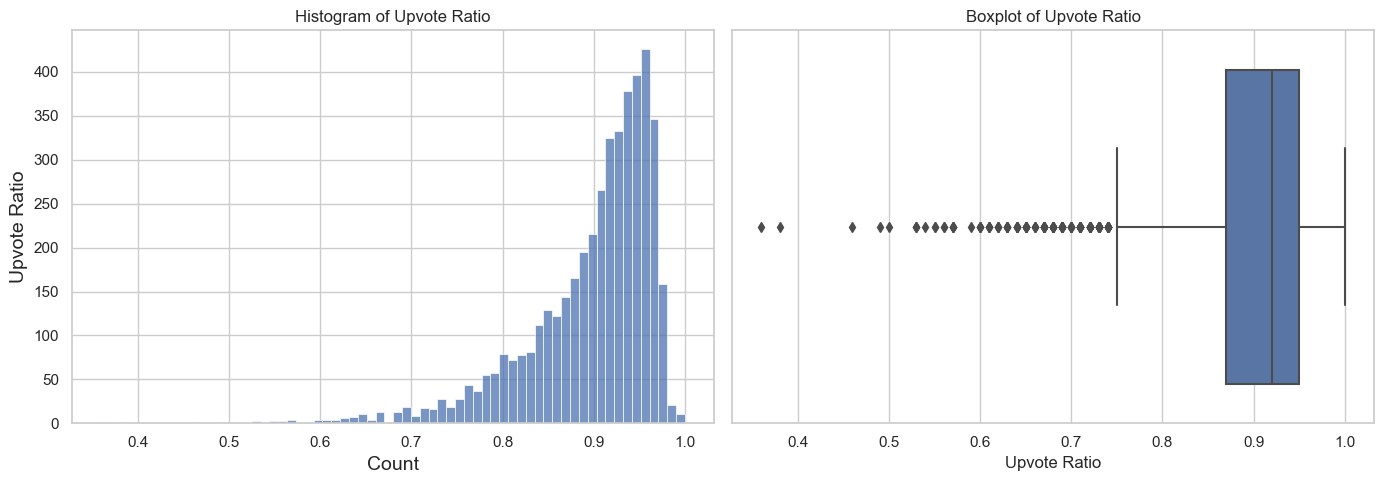

In [5]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Initialize the figure and a grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns for the subplots

# Histogram plot for 'Upvote Ratio'
sns.histplot(data=data, x='Upvote Ratio', ax=ax[0])
ax[0].set_title('Histogram of Upvote Ratio')
ax[0].set_xlabel('Count', fontsize=14)
ax[0].set_ylabel('Upvote Ratio', fontsize=14)
# Boxplot for 'Upvote Ratio'
sns.boxplot(x=data['Upvote Ratio'], ax=ax[1])
ax[1].set_title('Boxplot of Upvote Ratio')

# Display the plots side by side
plt.tight_layout()
plt.show()


**Observation:**

The histogram and boxplot reveal that the Upvote Ratio spans from 0 to 1, aligning with expectations for a ratio metric. The data skews positively, with most values clustering between 0.85 and 0.95, reflecting the high engagement typical. I expected the majority of the upvote ratio to be high because the data that I used is a collection of the top 10 daily posts for the mentioned categories. When seeing outliers from the boxplot, they are typically to be removed. However, in this case, I choose not to remove outliers to maintain the representativeness of the dataset as these outliers are consistent with the expected knowledge (e.g., posts can be extremely popular or unpopular due to their content). Additionally, removing them can lead to biased estimates in the machine learning models. 

## 6. Methodology: 
TF-IDF, or Term Frequency-Inverse Document Frequency, plays a pivotal role in achieving the research goals outlined, by transforming the textual content of Reddit post titles into a quantifiable feature space. This transformation enables the exploration of how linguistic patterns within titles can influence a post's popularity on Reddit, particularly its upvote ratio. By assigning weights to words based on their frequency in a particular document relative to their frequency across all documents, TF-IDF highlights the importance of specific terms that may be indicative of content engagement.

Incorporating TF-IDF into Linear Regression and Random Forest Regression models transforms Reddit post titles into meaningful numerical data, aiding in the prediction of post popularity. Linear Regression analyzes the direct impact of word significance on the upvote ratio, while Random Forest delves into more complex, non-linear relationships by examining the collective influence of various text features. I will discuss further the mathematical and logic of how these models work in section 7. C. This application of TF-IDF facilitates the accurate forecasting of post engagement and uncovers the specific words that significantly affect a post's appeal, directly supporting the research hypothesis and goals.

### 6.A. TF-IDF: 
TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a statistical measure used to evaluate the importance of a word within a document in relation to a collection of documents or a corpus. The TF part computes the frequency of a word in a document, indicating how often it appears. The IDF part measures how common or rare a word is across the entire corpus. The main idea behind TF-IDF is that if a word appears frequently in a document but not in many documents, it is likely to be important. The calculation combines these two measures to assign a weight to each word. Words with higher weights are considered more important. The formula for TF-IDF is given by $$TF-IDF=TF×IDF$$

### General Explanation TF-IDF Algorithm 
For this section, I will use a fake dataset to demonstrate how the logic behind the TF-IDF calculation:


In [6]:

# Creating a pandas DataFrame with 4 different sentences
sentences = ["The moon shines brightly at night.",
             "The stars and moon create a beautiful sight.",
             "A journey of a thousand miles begins with a single step.",
             "Stars, nuclear furnaces of the cosmos, convert hydrogen into helium through the process of nuclear fusion, releasing immense energy.",
             "The sun is a star, and it is the center of our solar system.",
             "The lifecycle of a star is determined by its mass, starting from a nebulous cloud of gas and dust, evolving through stages until it becomes a supernova or a more subdued white dwarf."
             "Moon is a natural satellite of the Earth, and it is the fifth largest moon in the solar system.",]

# Create a DataFrame
df_test = pd.DataFrame(sentences, columns=['text'])

df_test


,text
0,The moon shines brightly at night.
1,The stars and moon create a beautiful sight.
2,A journey of a thousand miles begins with a si...
3,"Stars, nuclear furnaces of the cosmos, convert..."
4,"The sun is a star, and it is the center of our..."
5,The lifecycle of a star is determined by its m...


**Step 1:** Create Bag of words

In the Bag of Words (BoW) approach, I transform text into a numerical matrix by counting how often each word appears in a document while excluding common words known as stopwords to avoid skewing the analysis. The code uses `spacy` to tokenize documents, removing punctuation and whitespace, and filters out stopwords to focus on meaningful words. This process, including lemmatization to unify word forms, simplifies the text data into a compact numerical form, enabling precise analysis by highlighting the significant words and their frequencies within documents.


In [7]:
# Find stopwords
stop_words = STOP_WORDS

# Load English tokenizer. Parser or named entity recognition is not needed this task.
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])


# Tokenize the text
def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

docs = list(nlp.pipe(df_test.text))

In [8]:
# initialize the CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False)

# fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df.T.head()

Dataframe Shape: (6, 48)


,0,1,2,3,4,5
beautiful,0,1,0,0,0,0
begin,0,0,1,0,0,0
brightly,1,0,0,0,0,0
center,0,0,0,0,1,0
cloud,0,0,0,0,0,1


Text(0.5, 1.0, 'Term Frequency Distribution')

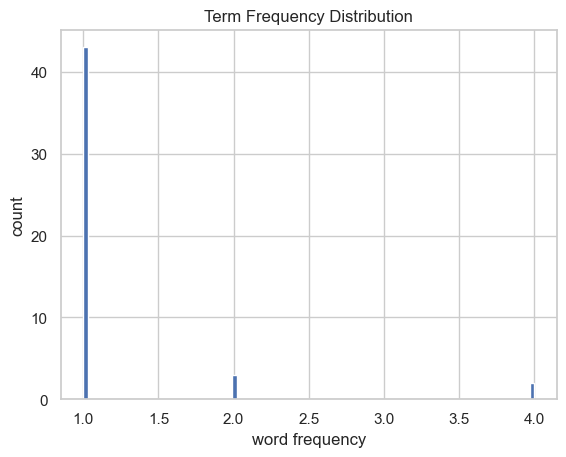

In [9]:
# Plot the term frequency distribution
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

**Step 2:** Calculate Inverse Document Frequency
Inverse Document Frequency (IDF) helps us understand which words are truly unique and significant across a collection of texts. To calculate IDF, most software programs, including the one I use for this research `sklearn`, use a simple formula:

$$IDF = \log(\frac{1 + \text{total number of documents}}{1+\text{number of documents with the words}})$$

This formula makes sure I don't end up with a problem when a word doesn't show up in any documents, by adding one to both the total number of documents and the number of documents that contain the word. The "log" part of the formula helps keep the numbers manageable, especially when a word shows up a lot in just a few documents.

In simpler terms, I create a list where each word has a score. A lower score means the word is common, and a higher score means it's rarer and possibly more interesting. This way, I can sift through a lot of text and focus on what's really important.


In [10]:
# Calculate the Inverse Document Frequency (IDF)
num_documents = len(bow_df) # number of documents

# Define a function to calculate the IDF
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  idf_value = np.log((1+num_documents)/(1+documents_containing_term))  # add 1 to the numerator and denominator to avoid division by zero
  return idf_value

# Calculate the IDF for each term
idf = pd.Series({term:idf(term) for term in bow_df.columns})
idf.head()

beautiful    1.252763
begin        1.252763
brightly     1.252763
center       1.252763
cloud        1.252763
dtype: float64

**Step 3: Calculate Term Frequency**
Term frequency measures how often a word appears in a document, adjusted by the document's length to ensure fairness across texts of different sizes. By dividing the count of each word by the total number of words in a document, as shown in the code below, I have a normalized representation where each entry reflects the relative importance of a word within its specific document context.

In [11]:
# Create a new dataframe with the idf values
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows') # divide each token count by the total token count for the row.
tf_df

,beautiful,begin,brightly,center,cloud,convert,cosmo,create,determine,dust,...,stage,star,start,step,subdued,sun,supernova,system,thousand,white
0,0.0,0.000000,0.25,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.2,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.166667,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.166667,0.000000
3,0.0,0.000000,0.00,0.0,0.000000,0.076923,0.076923,0.0,0.000000,0.000000,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.00,0.2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.200000,0.000000,0.000000
5,0.0,0.000000,0.00,0.0,0.041667,0.000000,0.000000,0.0,0.041667,0.041667,...,0.041667,0.041667,0.041667,0.000000,0.041667,0.0,0.041667,0.041667,0.000000,0.041667


**Step 4: Calculate TF-IDF**
This section of the code will multiply the result from TF and IDF calculation in steps 2 and 3. $TF-IDF = TF \times IDF$. The results of this matrix highlight the importance of each word within each document relative to the entire corpus. I then transpose the matrix for easy reading. 

In [12]:
# Multiply the term frequency by the inverse document frequency
tfidf_df = tf_df.copy().multiply(idf, axis='columns')

# Display the Tranpose of tfidf_df 
tfidf_df.T.head()


,0,1,2,3,4,5
beautiful,0.000000,0.250553,0.000000,0.0,0.000000,0.000000
begin,0.000000,0.000000,0.208794,0.0,0.000000,0.000000
brightly,0.313191,0.000000,0.000000,0.0,0.000000,0.000000
center,0.000000,0.000000,0.000000,0.0,0.250553,0.000000
cloud,0.000000,0.000000,0.000000,0.0,0.000000,0.052198


### 6.B. TF-IDF Pipeline
Instead of manually executing the steps to compute TF-IDF as described, I'll use the `TfidfVectorizer` from Python's `scikit-learn` library for a more efficient approach. This function accomplishes precisely what was outlined in the previous steps, allowing the process to be more streamlined. For the rest of this paper I will be using the afformentioned data set from part 5 to perform analysis.

**Applying the function to the dataset:**


In [13]:
# TF-IDF values for the dataframe
docs = list(nlp.pipe(processed_data.Title)) 

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=6)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df.head()

Dataframe Shape: (4462, 1422)


,$,+,/r,0,1,10,100,11,12,13,...,york,young,youtube,zealand,zelda,zelenskyy,zero,|,£,’
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.617843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Word Frequency analysis**
In this section, I will analyze the frequency of words in the dataset, which consists of the top 10 daily posts from Reddit, through Word Cloud. By identifying the most frequently occurring words, I can gain insights into which terms are likely to generate a high number of upvotes. 

#### Word Cloud:

Dataframe Shape: (4462, 1422)


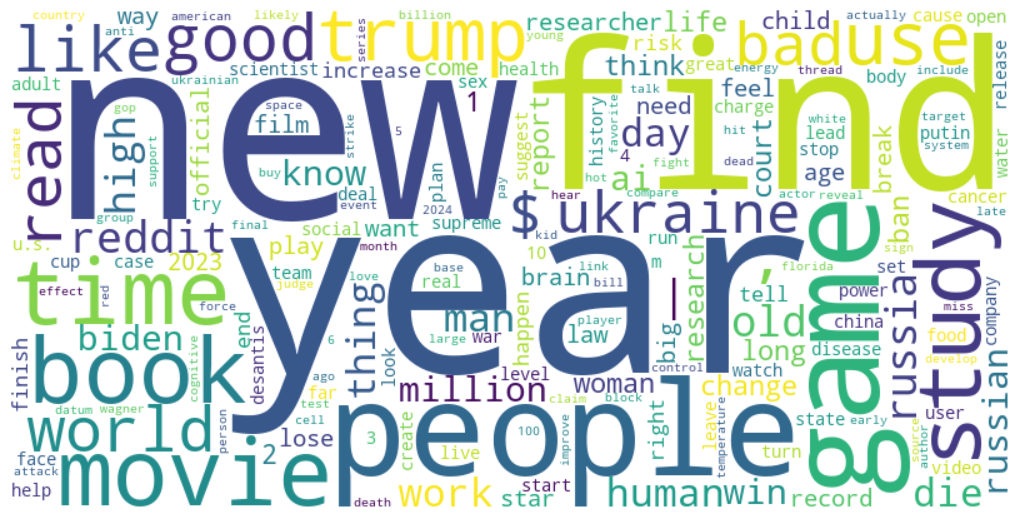

In [14]:
# initialize the CountVectorizer
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=6)

# fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')

# Summing up the occurrences of each word to get their frequencies
word_frequencies = bow_df.sum(axis=0).to_dict()

# Creating the WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white')

# Generate the word cloud using the frequencies
wordcloud.generate_from_frequencies(word_frequencies)

# Plotting the WordCloud image                        
plt.figure(figsize=(10, 7), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

**Observation:**
The word cloud offers a visual representation of the terms most frequently mentioned in the top daily Reddit posts, with the size of each word corresponding to its frequency.

Words that are larger, "game," "book," "movie," and "study",  may suggest topics and content that are more engaging to the Reddit community, potentially leading to a higher number of upvotes. Similarly, the appearance of public figures, and terms associated with current events, such as "2023," "Russia", "Ukraine", "Biden", and "Trump" may reflect the community's interest in ongoing political or global affairs. Essentially, the word cloud can act as a guide to understanding what content is likely to perform well and could assist in strategically planning posts to align with user interests and trending topics.

By utilizing machine learning models and incorporating measures of importance of a word, I can investigate if the significance of these frequently occurring words actually correlates with the upvote ratio of the posts.

## 7. Train Model
To train and test the performance of Linear Regression and Random Forest Regression models, especially in predicting the upvote ratio based on Reddit post titles, the process involves four key steps: 

1) Identify the research features and predictor: 
    - features: TF-IDF analysis for `Title` column
    - predictor: `Upvote Ratio`

2) The dataset is split into a training set for developing the model and a test set for evaluation. 

3) The model is trained on the training set, where it learns to predict the upvote ratio using features derived from TF-IDF analysis of post titles. This step also helps in identifying which words are significantly associated with higher upvote ratios. 

4) Per model, I will find the top 20 words that have the highest and lowest coefficients or importance.
5) The model's performance is assessed on the test set to evaluate its accuracy in predicting upvote ratios, providing insights into how well it can generalize to unseen data.

#### 7.A. Split data for testing and training: 
I first want to split data into 80% training set and 20% testing set. This ensures that the model can learn from a substantial portion of the data while still being able to evaluate its performance through the testing set

In [15]:
# set random seed for reproducibility
seed = 42 

X = processed_data['Title'] # the features I want to analyze
ylabels = processed_data['Upvote Ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
X_train = list(nlp.pipe(X_train)) 
X_test = list(nlp.pipe(X_test)) 


#### 7.B Train Data
After splitting the data, I would then use the training data set to train both models: Linear Regression and Random Forest Regression

**Linear Regression Model** 

A linear regression model is a fundamental statistical method used in machine learning to predict a continuous outcome variable based on one or more predictor variables, which are the inputs used to predict the target variable. The model assumes a linear relationship between the predictor variables and the target variable, aiming to fit a straight line through the data that best captures their relationship. The equation for this line in the case of simple linear regression with one predictor is: $$y = mx + b$$


In [16]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

ln_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('linear_regression', linear_regressor)
])

# Fit the pipeline to the training data
ln_pipeline.fit(X_train, y_train)

# Predict the upvote ratio on the test set
ln_y_pred = ln_pipeline.predict(X_test)


**Random Forest Regression**
Random Forest Regression is an ensemble learning method used for predicting continuous outcomes, leveraging multiple decision trees to produce more accurate and stable predictions. Unlike a single decision tree that may suffer from overfitting, a Random Forest aggregates the results from numerous trees, each trained on a random subset of the data and features. This process, known as "bagging" (Bootstrap Aggregating), enhances the model's ability to generalize by reducing the variance without significantly increasing bias. By taking the average prediction from all trees in the forest, Random Forest can handle complex datasets with high-dimensional features, such as those from TF-IDF matrices, making it robust against overfitting and capable of capturing nonlinear relationships.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming tfidf_vectorizer is already defined, along with X_train, X_test, y_train, y_test

# Initialize the pipeline with RandomForestRegressor
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
rf_y_pred = rf_pipeline.predict(X_test)


#### 7.C Coefficient and Importance:

The coefficients from a Linear Regression model and the feature importances derived from a Random Forest Regression offer valuable insights into the relationship between specific words in Reddit post titles and their upvote ratios. Linear Regression coefficients quantify how much the presence of certain words influences the upvote ratio, with higher absolute values indicating a stronger impact, whether positive or negative. On the other hand, feature importances from Random Forest provide a measure of how much each word contributes to the predictive accuracy of the model, highlighting the words that play a significant role in determining a post's popularity. Together, these metrics allow for a comprehensive understanding of which words are most influential in attracting upvotes, thereby offering a nuanced view of content engagement on Reddit. This analytical approach directly supports the exploration of linguistic patterns and their effects on post engagement, shedding light on the intricate dynamics of content popularity.

In [18]:
# Getting feature names from the TF-IDF vectorizer
feature_names = ln_pipeline.named_steps['tfidf'].get_feature_names_out()

# Getting feature importances from the Random Forest Regressor
feature_importances_rf = rf_pipeline.named_steps['random_forest'].feature_importances_

# Getting coefficients from the Linear Regression model
coefficients_ln = ln_pipeline.named_steps['linear_regression'].coef_

# Creating a DataFrame for Linear Regression coefficients
coefficients_df = pd.DataFrame({
    'feature': feature_names,
    'linear_regression_coefficient': coefficients_ln
})

# Creating a DataFrame for Random Forest feature importances
importances_df = pd.DataFrame({
    'feature': feature_names,
    'random_forest_importance': feature_importances_rf
})


**Top 20 highest/lowest coefficients: - Linear Regression Model**

In [19]:
# Top 20 highest coefficients for linear regression
# Get top 20 highest coefficients
bottom_coeffs = coefficients_df.sort_values(by='linear_regression_coefficient').head(20).reset_index(drop=True)
bottom_coeffs.columns = ['bot_'+col for col in bottom_coeffs.columns]

# Get top 20 lowest coefficients (remember, they are already sorted by absolute value)
top_coeffs = coefficients_df.sort_values(by='linear_regression_coefficient').tail(20).sort_values(by='linear_regression_coefficient', ascending=False).reset_index(drop=True)
top_coeffs.columns = ['top_'+col for col in top_coeffs.columns]

# Combine top and bottom coefficients into a single DataFrame for Linear Regression
print("Linear Regression - Top 20 Highest & Lowest Coefficients:")
pd.concat([top_coeffs, bottom_coeffs], axis=1).reset_index(drop=True)

Linear Regression - Top 20 Highest & Lowest Coefficients:


,top_feature,top_linear_regression_coefficient,bot_feature,bot_linear_regression_coefficient
0,emergency,0.234770,consumer,-0.236117
1,greene,0.220901,tour,-0.233622
2,birth,0.210790,decline,-0.189350
3,clarence,0.208790,cricket,-0.188130
4,rare,0.181857,marjorie,-0.177962
5,firm,0.174473,explosion,-0.167225
6,occur,0.170295,therapy,-0.165778
7,supreme,0.164729,french,-0.164774
8,childhood,0.163580,display,-0.155922
9,population,0.154436,past,-0.154442


**Top 20 highest/lowest coefficients: - Random Forest Regression Model**

In [20]:
# Top 20 highest importance for random forest regression
# Get bottom 20 lowest importance
bottom_imp = importances_df.sort_values(by='random_forest_importance').head(20).reset_index(drop=True)
bottom_imp.columns = ['bot_'+col for col in bottom_imp.columns]

# Get top 20 lowest importance (remember, they are already sorted by absolute value)
top_imp = importances_df.sort_values(by='random_forest_importance').tail(20).sort_values(by='random_forest_importance', ascending=False).reset_index(drop=True)
top_imp.columns = ['top_'+col for col in top_imp.columns]

# Combine top and bottom importance into a single DataFrame for Linear Regression
print("Random Forest Regression - Top 20 Highest & Lowest Importance:")
pd.concat([top_imp, bottom_imp], axis=1).reset_index(drop=True)

Random Forest Regression - Top 20 Highest & Lowest Importance:


,top_feature,top_random_forest_importance,bot_feature,bot_random_forest_importance
0,read,0.028635,teenager,0.000003
1,trump,0.019435,lawyer,0.000005
2,single,0.013508,14,0.000006
3,ukraine,0.011944,active,0.000006
4,9,0.011912,information,0.000007
5,find,0.009213,disability,0.000007
6,game,0.008777,georgia,0.000007
7,james,0.008083,product,0.000008
8,money,0.007702,immigrant,0.000008
9,russia,0.007252,mercenary,0.000009


**Observation:** 
- Linear Regression shows that terms like "consumer" and "tour" negatively correlate with the upvote ratio, possibly indicating less popular content when these words are used.
- Linear Regression coefficients show "emergency" and "greene" as top positively influential words, suggesting posts with these terms could be more popular. The mentioned of "greene" in this context is not a typographical mistake for "green" but actually pertains to U.S. Representative Marjorie Taylor Greene. This can be confirmed in the code provided below.
- Random Forest feature importances indicate "read" and "trump" as top predictors, but the importance scores are quite low, showing no single word dramatically sways the model.
- The lowest importance features in Random Forest, such as "teenager" and "lawyer," have extremely low scores, reflecting a minimal individual effect on upvote ratio predictions.
- There are no overlapping words between the highest and lowest coefficients in Linear Regression and the importance scores in Random Forest, highlighting each model's distinct approach to assessing feature relevance. Linear Regression attributes direct individual effects to words, while Random Forest considers a broader context and interactions among features, leading to a diverse set of influential words.

In [21]:
# Check "greene" string in the Title
processed_data[processed_data['Title'].str.contains('greene', case=False, na=False)]['Title'].unique()

array(['Marjorie Taylor Greene calls Lauren Boebert a ‘little b****’ on House floor, report says',
       'House Freedom Caucus Might Boot Out Marjorie Taylor Greene: Report',
       'Marjorie Taylor Greene rages at Pride chant after failing to realize it’s sarcastic',
       'Rep. Marjorie Taylor Greene Booted From Right-Wing House Freedom Caucus',
       'Marjorie Taylor Greene leads false claims that Philadelphia shooter is trans',
       'Republican women learn the hard way: Complicity will not protect you — The Freedom Caucus ousts Marjorie Taylor Greene and Ron DeSantis ends alimony for older, mostly conservative women',
       'More than half of the world’s oceans have become greener in the past 20 years, probably because of global warming.',
       'Majority of Republicans vote down Greene, Gaetz Ukraine bills',
       'Marjorie Taylor Greene complains about "socialist" Medicare',
       'Marjorie Taylor Greene compares Biden to FDR, LBJ. Thanks for the free campaign ad!',
    

#### 7.D: Result of Models' Prediction for both models

**Evaluate Model Performance on Test Data:**

In [22]:
# Convert numpy arrays to pandas Series with matching index as y_test
ln_y_pred_series = pd.Series(ln_y_pred, index=y_test.index)
rf_y_pred_series = pd.Series(rf_y_pred, index=y_test.index)

# Calculate residuals for both models
residuals_ln = y_test - ln_y_pred_series
residuals_rf = y_test - rf_y_pred_series

# Evaluation for Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred_series) # Mean Squared Error
r2_rf = r2_score(y_test, rf_y_pred_series)     # R-squared
coefficient_rf = y_test.corr(rf_y_pred_series)  # Pearson correlation coefficient

# Evaluation for Linear Regression
mse_ln = mean_squared_error(y_test, ln_y_pred_series) #    Mean Squared Error
r2_ln = r2_score(y_test, ln_y_pred_series)     # R-squared
coefficient_ln = y_test.corr(ln_y_pred_series)  # Pearson correlation coefficient


# Summarize the evaluations into a DataFrame
evaluations = pd.DataFrame({
    'model_name': ['Random Forest Regression', 'Linear Regression'],
    'Pearson coefficient': [coefficient_rf, coefficient_ln],
    'mse': [mse_rf, mse_ln],
    'r2': [r2_rf, r2_ln]
})

evaluations

,model_name,Pearson coefficient,mse,r2
0,Random Forest Regression,0.379848,0.004857,0.094325
1,Linear Regression,0.326579,0.005898,-0.099948


**Observation:** I have some observations about the models' performance
- The Random Forest model has a higher Pearson coefficient than Linear Regression, suggesting it has a stronger correlation with the actual upvote ratios.
- The Mean Squared Error (MSE) is lower for Random Forest, indicating it has a better fit to the data with fewer errors in prediction compared to Linear Regression.
- The $R^2$ value for Random Forest is positive, albeit low, showing it can explain approximately 9.43% of the variance in upvote ratios. In contrast, the Linear Regression model has a negative $R^2$, implying it fails to account for the variability in the upvote ratios.

These observations suggest that the Random Forest Regression model is more effective for this task than Linear Regression. 
The reliability of both models as determinants of the upvote ratio is indeed challenged by the low $R^2$ values. However, the moderate positive Pearson coefficients hint that the models, especially the Random Forest Regression, are identifying some level of linear relationship between the features derived from the TF-IDF analysis and the upvote ratio. It's important to note that while the $R^2$ values are low, they are not the sole measure of a model's usefulness. The models could still be providing insights into specific trends and patterns that are valuable for understanding some aspects of the data, even if they don't capture the entire picture. 

#### Model Performance Visualization:
Besides evaluating the model performance based on MSE and $R^2$, I want to create visualizations that describe "True Values vs Predicted Values" and "Distribution of Residuals"

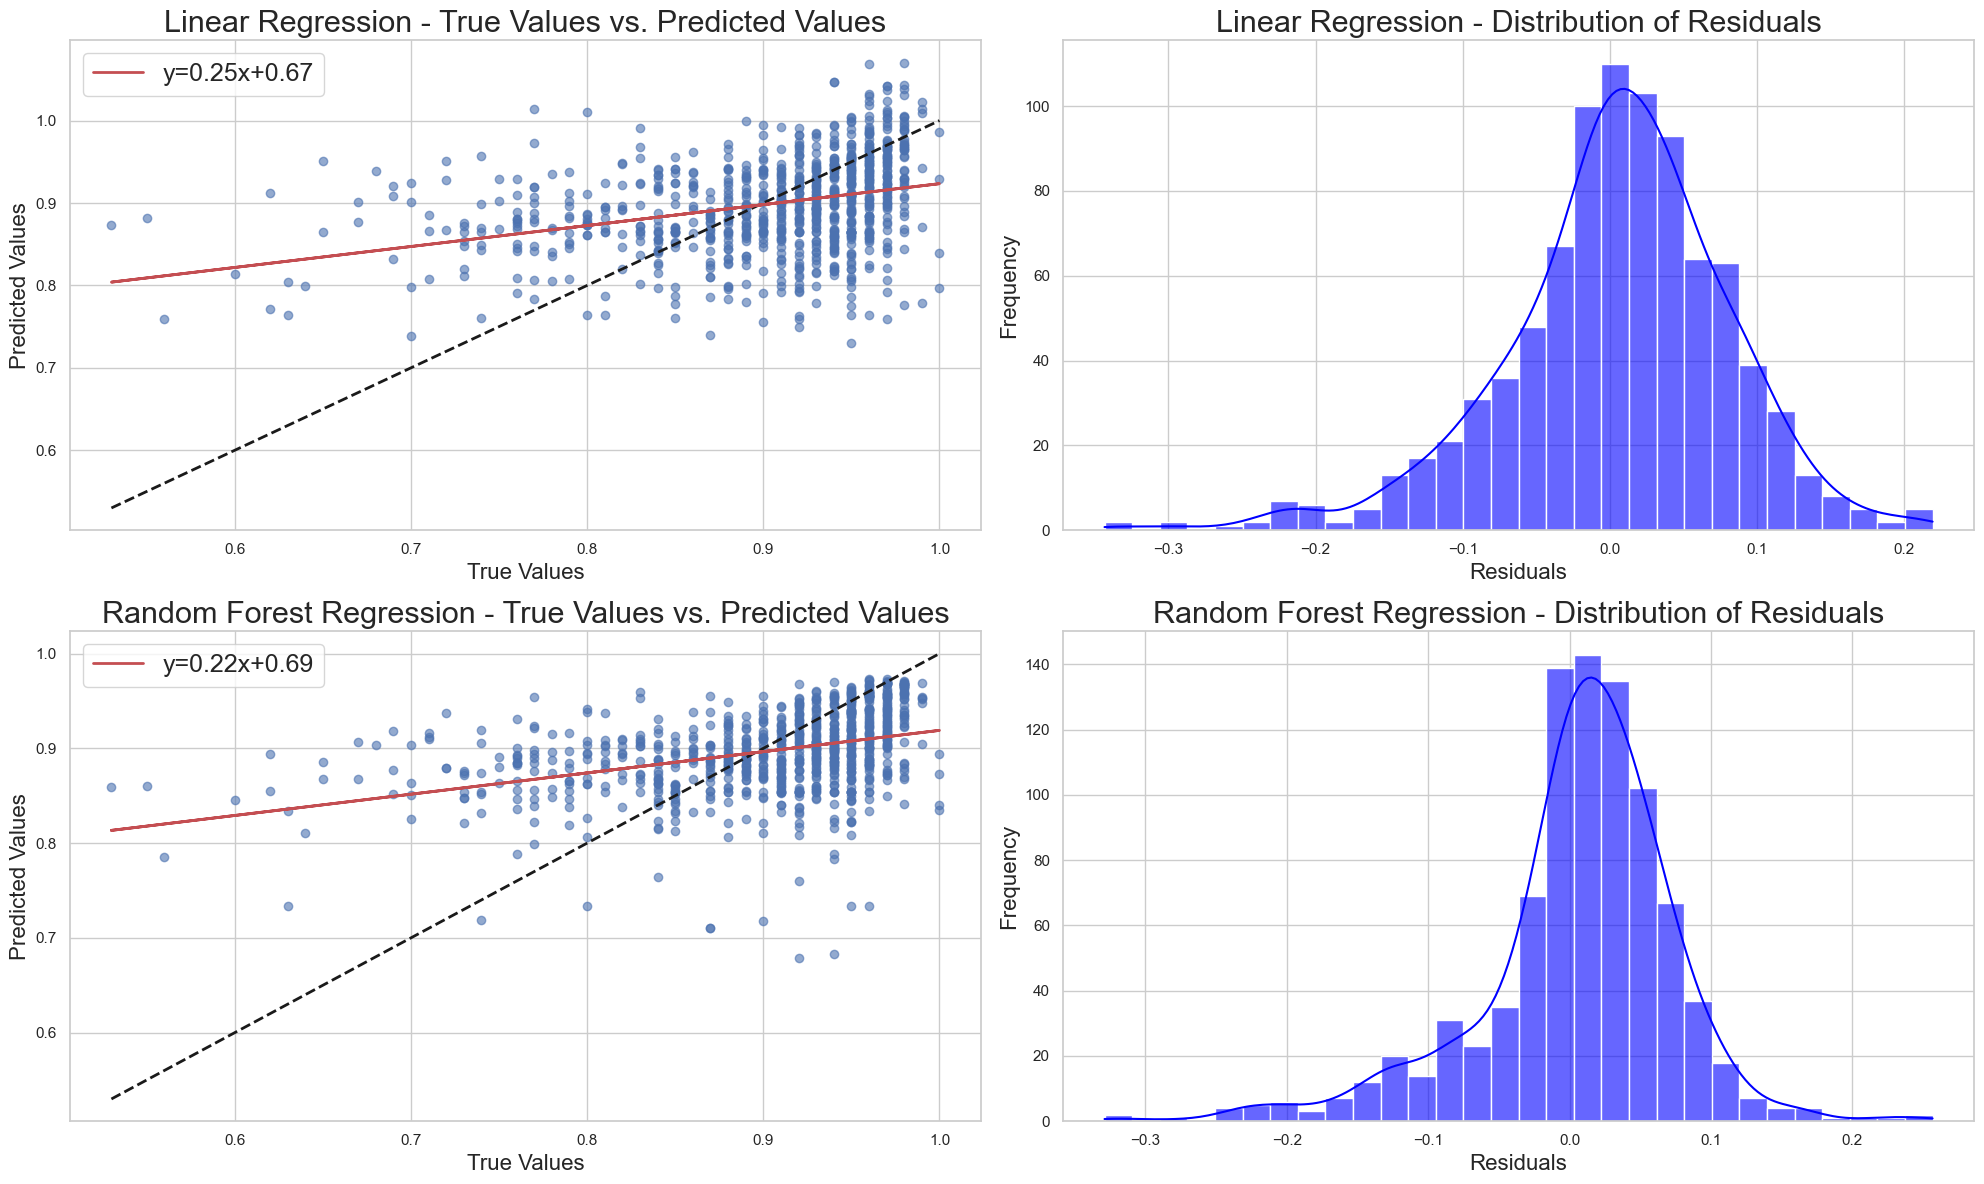

R^2 value for Linear Regression: -0.100
R^2 value for Random Forest Regression: 0.094


In [28]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the font size
title_fontsize = 22
axis_fontsize = 16
legend_fontsize = 18

# Initialize the figure and a grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

# Scatter plot for true values vs. predicted values for Linear Regression
ax[0, 0].scatter(y_test, ln_y_pred, alpha=0.6)
ax[0, 0].set_title('Linear Regression - True Values vs. Predicted Values', fontsize=title_fontsize)
ax[0, 0].set_xlabel('True Values', fontsize=axis_fontsize)
ax[0, 0].set_ylabel('Predicted Values', fontsize=axis_fontsize)
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0, 0].plot(y_test, slope_ln * y_test + intercept_ln, 'r-', lw=2, label=f'y={slope_ln:.2f}x+{intercept_ln:.2f}')
ax[0, 0].legend(fontsize=legend_fontsize)

# Residuals plot for Linear Regression
sns.histplot(residuals_ln, kde=True, bins=30, color='blue', alpha=0.6, ax=ax[0, 1])
ax[0, 1].set_title('Linear Regression - Distribution of Residuals', fontsize=title_fontsize)
ax[0, 1].set_xlabel('Residuals', fontsize=axis_fontsize)
ax[0, 1].set_ylabel('Frequency', fontsize=axis_fontsize)

# Scatter plot for true values vs. predicted values for Random Forest Regression
ax[1, 0].scatter(y_test, rf_y_pred, alpha=0.6)
ax[1, 0].set_title('Random Forest Regression - True Values vs. Predicted Values', fontsize=title_fontsize)
ax[1, 0].set_xlabel('True Values', fontsize=axis_fontsize)
ax[1, 0].set_ylabel('Predicted Values', fontsize=axis_fontsize)
ax[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1, 0].plot(y_test, slope_rf * y_test + intercept_rf, 'r-', lw=2, label=f'y={slope_rf:.2f}x+{intercept_rf:.2f}')
ax[1, 0].legend(fontsize=legend_fontsize)

# Residuals plot for Random Forest Regression
sns.histplot(residuals_rf, kde=True, bins=30, color='blue', alpha=0.6, ax=ax[1, 1])
ax[1, 1].set_title('Random Forest Regression - Distribution of Residuals', fontsize=title_fontsize)
ax[1, 1].set_xlabel('Residuals', fontsize=axis_fontsize)
ax[1, 1].set_ylabel('Frequency', fontsize=axis_fontsize)

# Display the plots with the adjusted font sizes
plt.tight_layout()
plt.show()

# Calculate the R^2 values
r2_value_ln = r2_score(y_test, ln_y_pred)
r2_value_rf = r2_score(y_test, rf_y_pred)

print(f"R^2 value for Linear Regression: {r2_value_ln:.3f}")
print(f"R^2 value for Random Forest Regression: {r2_value_rf:.3f}")

**Observation:**
- Best-Fit Lines: The red lines indicate the best-fit line calculated from the predictions. The coefficients suggest that for both models, the predicted values tend to be slightly lower than the true values, especially as the true values increase

- Identity Line: The black dashed lines represent the identity line where predicted values equal true values. For perfect predictions, all points would lie on this line. Both models have points spread around the line, indicating prediction errors.

- The Linear Regression plot appears to have a wider spread of predictions compared to the Random Forest, which is more tightly clustered. This could indicate that the Random Forest model predictions are more consistent.

- In the True Values vs. Predicted Values plot for the Linear Regression model, we observe predictions extending above the value of 1, which is not feasible since the upvote ratio inherently ranges between 0 and 1. This indicates that the Linear Regression model may not be capturing the underlying distribution correctly

- The Random Forest residuals also display a roughly bell-shaped distribution, but it seems to have a narrower peak and less skew, suggesting more accurate predictions with fewer large errors than Linear Regression.

- Neither of the residual plots shows perfect normality, which is often an assumption for the optimal performance of Linear Regression models, potentially explaining the poorer performance metrics for Linear Regression observed earlier.

**Observations on R^2 values:**
- Linear Regression Model Performance (R² = -0.100): The negative R² value indicates that the Linear Regression model performs worse than a simple horizontal line set at the average of the true values of the dependent variable. This suggests that the model does not fit the data well and does not provide a useful prediction.
- Random Forest Regression Model Performance (R² = 0.094): The R² value is close to zero, which indicates that the Random Forest model explains a very small fraction of the variance in the upvote ratio. While it is better than the Linear Regression model, it is still not a strong model.
- The Random Forest model is marginally better than the Linear Regression model in terms of R², but neither model is particularly good at making predictions in this case.

#### Model Performance through confusion matrices
**Confusion Matrices for both model on test data**

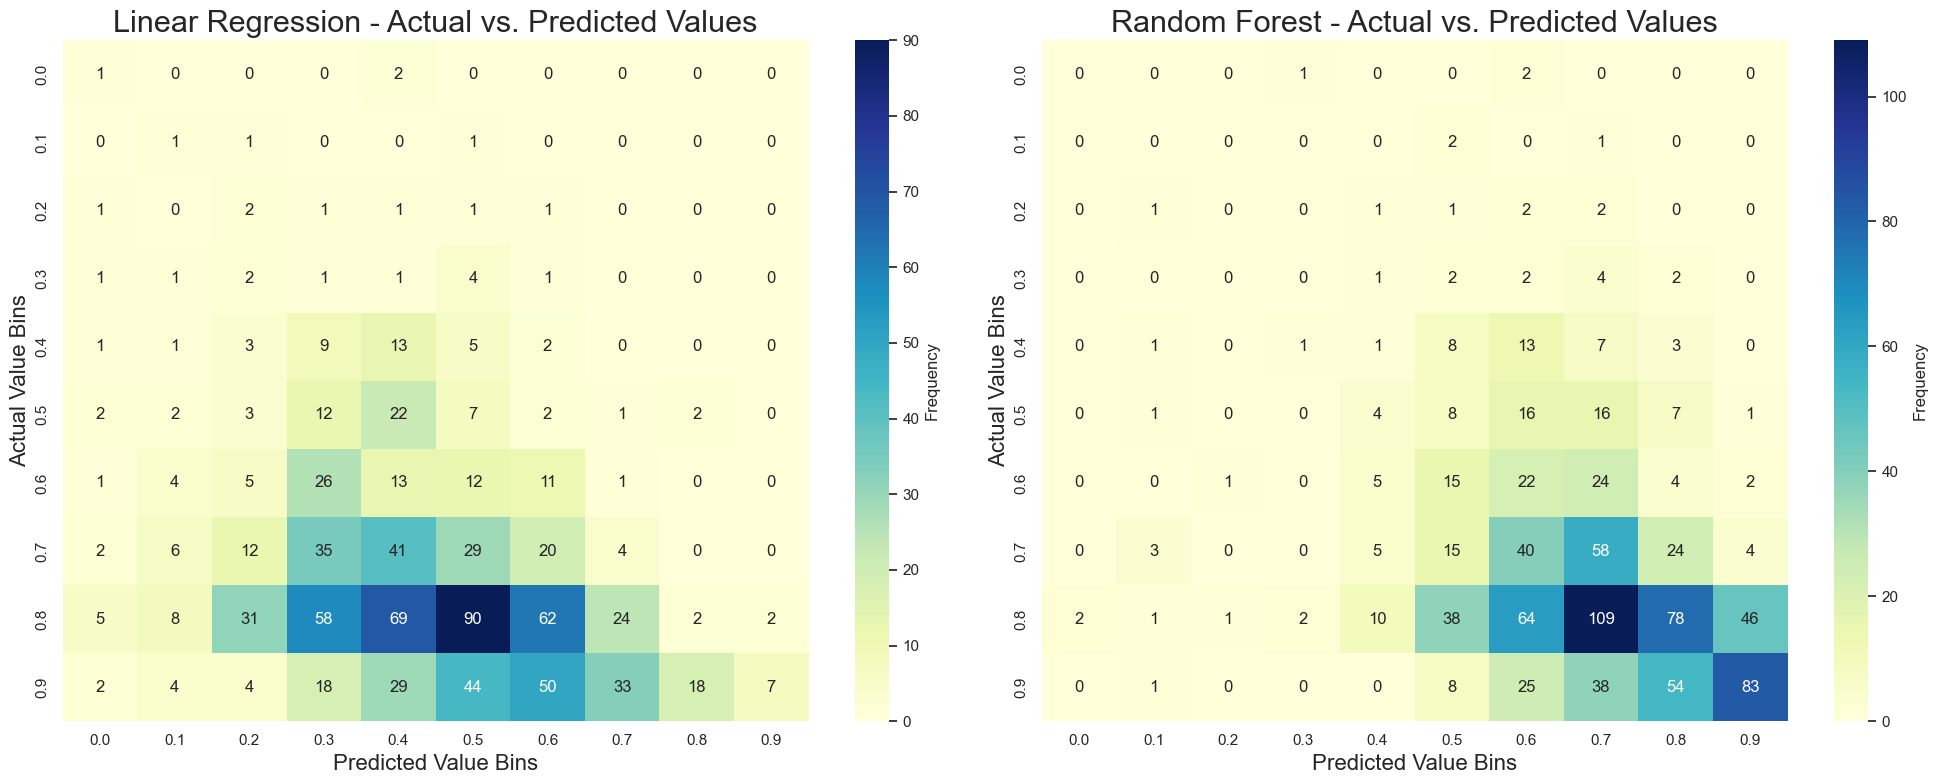

In [30]:
# Define bins
bins = np.linspace(0, 1, 11)

# Create 2D histograms for both sets of predictions
heatmap_data_ln, xedges_ln, yedges_ln = np.histogram2d(y_test, ln_y_pred, bins=(len(bins)-1, len(bins)-1))
heatmap_data_rf, xedges_rf, yedges_rf = np.histogram2d(y_test, rf_y_pred, bins=(len(bins)-1, len(bins)-1))

# Set up the matplotlib figure and axes for side-by-side heatmaps
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot the heatmap for Linear Regression
sns.heatmap(heatmap_data_ln, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Frequency'}, fmt='g', ax=ax[0])
ax[0].set_title('Linear Regression - Actual vs. Predicted Values', fontsize=title_fontsize)
ax[0].set_xlabel('Predicted Value Bins', fontsize=axis_fontsize)
ax[0].set_ylabel('Actual Value Bins', fontsize=axis_fontsize)

# Plot the heatmap for Random Forest Regression
sns.heatmap(heatmap_data_rf, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Frequency'}, fmt='g', ax=ax[1])
ax[1].set_title('Random Forest - Actual vs. Predicted Values', fontsize=title_fontsize)
ax[1].set_xlabel('Predicted Value Bins', fontsize=axis_fontsize)
ax[1].set_ylabel('Actual Value Bins', fontsize=axis_fontsize)

# Setting ticks and labels for both heatmaps
tick_locs = np.arange(0, len(bins)-1) + 0.5
tick_labels = [f"{b:.1f}" for b in bins[:-1]]

for a in ax:
    a.set_xticks(tick_locs)
    a.set_xticklabels(tick_labels)
    a.set_yticks(tick_locs)
    a.set_yticklabels(tick_labels)

plt.tight_layout()
plt.show()

**Observation**
- The Random Forest Regression model shows a clear diagonal trend in its confusion matrix, indicating a closer match between predicted and actual upvote ratios compared to the Linear Regression model.
- The Linear Regression model has a spread of predictions across higher upvote ratios, predicting values that exceed the actual range. This suggests overestimation issues.
- The concentration of darker shades along the diagonal in the Random Forest matrix points to a higher frequency of accurate predictions, underlining its superior performance over Linear Regression in this context.

## 8. Conclusion: 
This study has shown that using regression models combined with TF-IDF text analysis can somewhat predict how popular a Reddit post will be, based on its upvote ratio, though the level of accuracy differs between the models. The Random Forest Regression model, with a moderate positive Pearson coefficient of 0.379848 and an $R^2$ of 0.094325, can explain some variance in popularity, serving as a reasonable baseline for prediction. Conversely, Linear Regression’s weaker performance, indicated by a negative $R^2$ value, suggests it may be less adept for this task. Even though the models may not be highly reliable predictors in a statistical sense, they still offer some degree of utility in understanding the factors that contribute to upvote ratios on Reddit. The study further reveals that for both models, there is no single term that dominantly influences upvote ratios. The results, therefore, affirm the hypothesis that linguistic patterns have some sort of significant, though not exclusive, role in determining the popularity of content on Reddit. 

## 9. Limitations  
This research presents several limitations that should be acknowledged. A primary limitation is the reliance on the upvote ratio as the sole indicator of post popularity without access to the absolute numbers of upvotes and downvotes. This can introduce bias; for example, a post with four upvotes and no downvotes would have a perfect upvote ratio, potentially skewing results. Although the dataset was sourced from the top 10 daily posts, presumed to have diverse interactions to mitigate this skew, the issue remains a concern for the integrity of the findings.

Moreover, the predictive models cannot foresee social trends or events that may arise further in the future, which could significantly impact post popularity. The predictive power is thus limited to recognizing patterns within the scope of the current dataset.

Additionally, the scope of the study was limited to the titles of the most popular posts rather than encompassing a broader range of posts, which could have provided a more comprehensive understanding of factors influencing popularity across different levels of engagement.

Lastly, the inclusion of additional variables, such as the number of comments, the post's creation time, and the actual number of upvotes and downvotes, could offer more detailed insights and enhance the predictive accuracy of the models. The absence of these variables represents a missed opportunity for more nuanced analysis and understanding of the dynamics behind post popularity on Reddit.

## 10. Future Directions 

Future research on predicting Reddit post popularity could greatly benefit from incorporating more features, such as the number of comments, post timing, and detailed voting counts. This would allow for a more complex analysis, potentially increasing the predictive accuracy of the models. The use of advanced machine learning techniques, such as transformer-based models renowned for their effectiveness in text analysis, could also be a significant step forward. These incorporations might help us grasp the subtleties of language and context within Reddit post titles, possibly leading to improved recognition of patterns that drive user engagement.

Another valuable direction would be to expand the dataset beyond the top daily posts to encompass a broader array of posts from various subreddits. This comprehensive approach would provide a more representative sample of user interactions. Additionally, accounting for real-time trends and integrating multimedia content analysis could unveil the influence of current events and visual elements on post popularity. Delving into sentiment analysis of the comments could shed light on the community's perceptions and their effects on upvotes, offering a deeper understanding of the factors that resonate with Reddit audiences.

## 11. Citations: 

[1] Chow, Andrew R. (2023, September 15). Dumb Money and the Complicated Legacy of GameStop. *TIME*. https://time.com/6312307/gamestop-meme-stocks-dumb-money/

[2] Saraf, P. (n.d.). Top 100 Reddit Posts (Daily Update). Retrieved from https://www.kaggle.com/datasets/prathamsaraf1389/top-100-reddit-posts-daily-update?resource=download
